Importing Libraries

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Data Preprocessing
Training Image Processing

In [10]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 304 files belonging to 2 classes.


Validation Image Preprocessing

In [13]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 101 files belonging to 2 classes.


In [15]:
training_set


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [17]:
 for x,y in training_set:
     print(x,x.shape)
     print(y,y.shape)
     break

tf.Tensor(
[[[[149.0625    139.375      93.5      ]
   [138.0625    129.84375    92.6875   ]
   [ 19.78125    17.          6.78125  ]
   ...
   [ 80.15625    85.28125    49.71875  ]
   [ 88.8125     96.25       54.6875   ]
   [ 85.15625    91.03125    53.96875  ]]

  [[134.75      129.375      81.6875   ]
   [140.65625   134.65625    84.65625  ]
   [121.375     108.875      80.09375  ]
   ...
   [ 93.34375   103.34375    67.71875  ]
   [ 87.1875     97.1875     62.34375  ]
   [ 95.125     106.5        68.8125   ]]

  [[141.40625   137.84375    86.65625  ]
   [140.34375   134.90625    86.34375  ]
   [159.1875    152.75      107.375    ]
   ...
   [101.125     107.125      69.125    ]
   [114.        117.125      77.53125  ]
   [109.90625   116.71875    76.28125  ]]

  ...

  [[ 50.0625     56.0625     22.0625   ]
   [ 62.3125     68.3125     32.6875   ]
   [ 55.         56.5625     22.75     ]
   ...
   [121.90625   111.90625    99.90625  ]
   [138.84375   129.03125   116.46875  ]
   [1

Building Model

In [85]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.models import Sequential

In [87]:
model = Sequential()

In [89]:
## Building Convolution layer

In [91]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

C:\Users\Subham\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [93]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [95]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [97]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [99]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [101]:
model.add(Dropout(0.25))

In [103]:
model.add(Flatten())

In [105]:
model.add(Dense(units=1500,activation='relu'))

In [107]:
model.add(Dropout(0.4))

In [109]:
model.add(Dense(units=2,activation='softmax'))

# Compiling Model

In [112]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [117]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_46 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           3,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,788,726 (29.71 MB)

 Trainable params: 7,788,726 (29.71 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [120]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 70s 6s/step - accuracy: 0.4729 - loss: 1.7944 - val_accuracy: 0.5842 - val_loss: 0.6553
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step - accuracy: 0.5331 - loss: 0.7537 - val_accuracy: 0.6436 - val_loss: 0.6052
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 58s 6s/step - accuracy: 0.5671 - loss: 0.6689 - val_accuracy: 0.4455 - val_loss: 0.7631
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 55s 5s/step - accuracy: 0.6244 - loss: 0.6485 - val_accuracy: 0.6238 - val_loss: 0.6196
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 51s 5s/step - accuracy: 0.7226 - loss: 0.5281 - val_accuracy: 0.8119 - val_loss: 0.4005
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.8295 - loss: 0.4029 - val_accuracy: 0.8812 - val_loss: 0.3006
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 48s 5s/step - accuracy: 0.8368 - loss: 0.3707 - val_accuracy: 0.8515 - val_loss: 0.3245
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 941ms/step - accuracy: 0.8646 - loss: 0.3436 - val_accuracy: 0.8713 - val_lo


## Model Evaluation

In [123]:
# Model Evaluation on Training Set
train_loss,train_acc = model.evaluate(training_set)

10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 333ms/step - accuracy: 0.9488 - loss: 0.1609


In [125]:
print(train_loss,train_acc)

0.13848382234573364 0.9572368264198303


In [127]:
# Model Evaluation on Validation Set
val_loss,val_acc = model.evaluate(validation_set)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 288ms/step - accuracy: 0.9133 - loss: 0.2260


In [129]:
print(val_loss,val_acc)

0.2500411868095398 0.9108911156654358



## Saving Model

In [132]:
model.save("trained_model.keras")

In [134]:
training_history.history

{'accuracy': [0.5065789222717285,
  0.5756579041481018,
  0.5789473652839661,
  0.6644737124443054,
  0.7434210777282715,
  0.8092105388641357,
  0.8421052694320679,
  0.8618420958518982,
  0.9177631735801697,
  0.9440789222717285],
 'loss': [1.4113696813583374,
  0.7237436175346375,
  0.6588078141212463,
  0.6195774078369141,
  0.5106997489929199,
  0.4554964005947113,
  0.3619345724582672,
  0.3419423997402191,
  0.24459193646907806,
  0.19028672575950623],
 'val_accuracy': [0.5841584205627441,
  0.6435643434524536,
  0.4455445408821106,
  0.6237623691558838,
  0.8118811845779419,
  0.8811880946159363,
  0.8514851331710815,
  0.8712871074676514,
  0.9009901285171509,
  0.9108911156654358],
 'val_loss': [0.655261218547821,
  0.6051847338676453,
  0.7630724906921387,
  0.6195541024208069,
  0.4004700183868408,
  0.30062106251716614,
  0.3245128095149994,
  0.3287709057331085,
  0.2680366337299347,
  0.2500412166118622]}

In [136]:
## Recording History in json
import json
with open ("training_hist.json","w") as f:
    json.dump(training_history.history,f)

## Accuracy Visualization

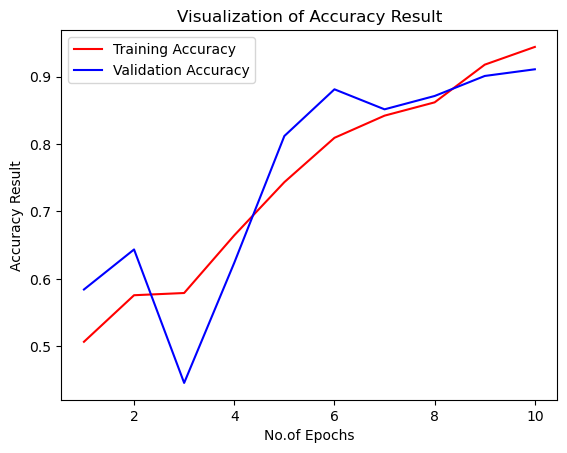

In [141]:
epochs = [i for i in range (1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['tra_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No.of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Some Other metrics for model evaluation

In [144]:
class_name = validation_set.class_names
class_name

['healthy', 'unhealthy']

In [146]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 124 files belonging to 2 classes.


In [148]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 379ms/step


(array([[6.63634739e-04, 9.99336302e-01],
        [9.98571515e-01, 1.42846629e-03],
        [1.28688896e-02, 9.87131178e-01],
        [3.21523577e-01, 6.78476453e-01],
        [9.94799256e-01, 5.20075392e-03],
        [8.05999696e-01, 1.94000274e-01],
        [5.51298726e-03, 9.94486988e-01],
        [1.57788792e-03, 9.98422146e-01],
        [2.35154822e-01, 7.64845192e-01],
        [9.19269800e-01, 8.07302147e-02],
        [2.71061659e-02, 9.72893834e-01],
        [3.41930687e-02, 9.65806961e-01],
        [1.26674594e-02, 9.87332523e-01],
        [9.83842492e-01, 1.61575712e-02],
        [1.41512246e-05, 9.99985814e-01],
        [2.41875891e-02, 9.75812376e-01],
        [2.22433567e-01, 7.77566493e-01],
        [9.97810066e-01, 2.18990515e-03],
        [1.77585069e-04, 9.99822438e-01],
        [9.93000150e-01, 6.99980650e-03],
        [8.58893454e-01, 1.41106546e-01],
        [1.35080051e-03, 9.98649180e-01],
        [9.98912454e-01, 1.08758640e-03],
        [8.69727314e-01, 1.3027268

In [150]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [152]:
predicted_categories

<tf.Tensor: shape=(124,), dtype=int64, numpy=
array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)>

In [154]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(124, 2), dtype=float32, numpy=
array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]

In [156]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(124,), dtype=int64, numpy=
array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1], dtype=int64)>

In [159]:
from sklearn.metrics import classification_report , confusion_matrix

In [161]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

              precision    recall  f1-score   support

     healthy       0.42      0.46      0.44        50
   unhealthy       0.61      0.57      0.59        74

    accuracy                           0.52       124
   macro avg       0.51      0.51      0.51       124
weighted avg       0.53      0.52      0.53       124



In [163]:
cm= confusion_matrix(Y_true,predicted_categories)
cm

array([[23, 27],
       [32, 42]], dtype=int64)

## Confusin Matrix Visualization

<Axes: >

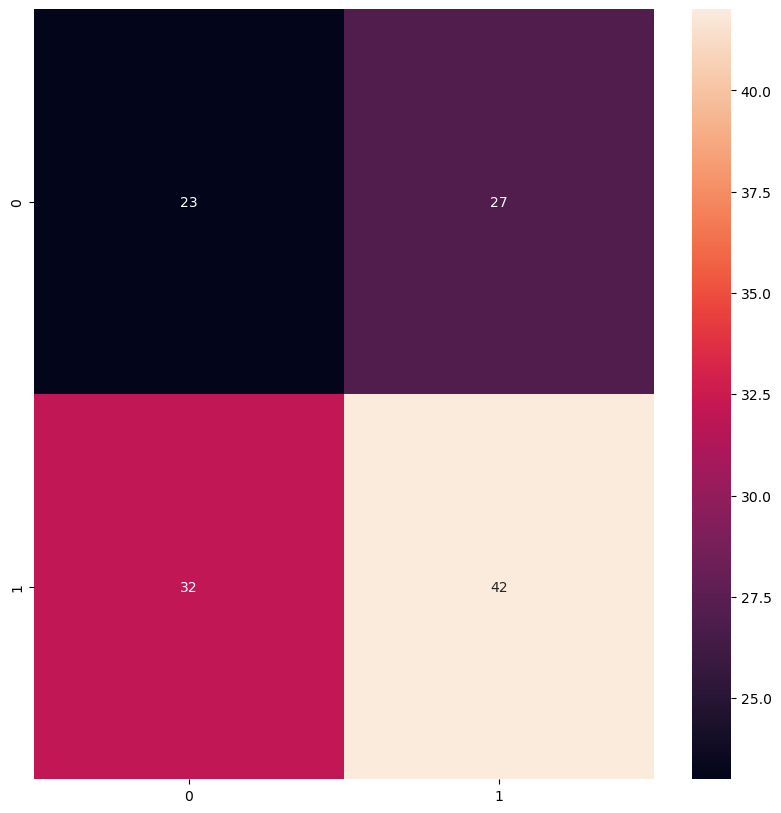

In [167]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)